# Multiple Linear Regression.

## Import required packages.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import matplotlib.pylab as plt
%matplotlib inline

## Upload data set for analysis. Explore, clean, and pre-process data. 

In [2]:
# Create data frame from the original data set.  
car_df = pd.read_csv('ToyotaCorolla.csv')

# Determine dimensions of dataframe. 
car_df.shape # It has 1436 rows and 39 columns.


(1436, 39)

In [3]:
# Display the first 5 records of the original data set.
car_df.head()


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,1,0,0,0,1,0,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


In [4]:
# Display the column names.
car_df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [5]:
# Create a subset data frame with 11 columns and top 
# 1000 records for regression analysis.

# Use the pd.concat() function to combine non-consecutive 
# columns into a new data frame, car_df_reg, with top 1000
# records.
# The axis argument specifies the dimension along which 
# the concatenation happens, 0=rows, 1=columns.
car_df_reg  = pd.concat([car_df.iloc[0:1000,2:4], 
           car_df.iloc[0:1000,6:10], 
           car_df.iloc[0:1000,11:14], 
           car_df.iloc[0:1000,16:18]], axis=1)

# Show the first 10 records of dataframe for regression analysis.
car_df_reg.head(10)


,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,210,1170
5,12950,32,61000,Diesel,90,0,0,2000,3,210,1170
6,16900,27,94612,Diesel,90,1,0,2000,3,210,1245
7,18600,30,75889,Diesel,90,1,0,2000,3,210,1245
8,21500,27,19700,Petrol,192,0,0,1800,3,100,1185
9,12950,23,71138,Diesel,69,0,0,1900,3,185,1105


In [6]:
# Display column data types in the dataframe for regression analysis.
car_df_reg.dtypes

Price             int64
Age_08_04         int64
KM                int64
Fuel_Type        object
HP                int64
Met_Color         int64
Automatic         int64
CC                int64
Doors             int64
Quarterly_Tax     int64
Weight            int64
dtype: object

In [7]:
# Change Fuel_Type variable to 'category'. 
car_df_reg.Fuel_Type = car_df_reg.Fuel_Type.astype('category')

# Display category classes and category type.
print(' ')
print('Category levels and changed variable type:')
print(car_df_reg.Fuel_Type.cat.categories)  # It can take one of three classes.
print(car_df_reg.Fuel_Type.dtype)  # Type is now 'category'.

 
Category levels and changed variable type:
Index(['CNG', 'Diesel', 'Petrol'], dtype='object')
category


In [8]:
# Convert category variable 'Fuel' into dummy variables, 
# Use drop_first=True to drop the first dummy variable, CNG.
car_df_reg = pd.get_dummies(car_df_reg, prefix_sep='_', 
                            drop_first=True)
car_df_reg.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC',
       'Doors', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

## Develop multiple linear regression model and make predictions. 

In [9]:
# Identify predictors and outcome of the regression model.
predictors = ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC',
               'Doors', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel',
               'Fuel_Type_Petrol']
outcome = 'Price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors]
y = car_df_reg[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# Display intercept and regression coefficients. Round
# them to 2 decimals.
print('Regression Model for Toyota Corolla Training Set')
print()
print('Intercept: ', np.round(car_lm.intercept_, 2)) # coefficient Bo
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(car_lm.coef_, 2)}))

# Price =  -1319.35 - 140.75Age_08_04 - 0.02KM + 36.10 HP + 84.28 Met_Color  + 416.78  Automatic 
#             + 0.02 CC - 50.66  Doors + 13.63 Quarterly_Tax  + 13.04 Weight + 1066.46 Fuel_Type_Diesel
#             + 2310.25 Fuel_Type_Petrol 



Regression Model for Toyota Corolla Training Set

Intercept:  -1319.35
           Predictor  Coefficient
0          Age_08_04      -140.75
1                 KM        -0.02
2                 HP        36.10
3          Met_Color        84.28
4          Automatic       416.78
5                 CC         0.02
6              Doors       -50.66
7      Quarterly_Tax        13.63
8             Weight        13.04
9   Fuel_Type_Diesel      1066.46
10  Fuel_Type_Petrol      2310.25


In [10]:
# Use predict() to score (make) predictions for validation set.
car_lm_pred = car_lm.predict(valid_X)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
print('Actual, Prediction, and Residual Prices for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': car_lm_pred, 
                       'Residual': valid_y - car_lm_pred}), 2)
print(result.head(10))

Actual, Prediction, and Residual Prices for Validation Set
     Actual  Predicted  Residual
507   11500   10607.33    892.67
818    8950    9272.71   -322.71
452   11450   10617.95    832.05
368   11450   13600.40  -2150.40
242   11950   12396.69   -446.69
929    9995    9496.50    498.50
262   13500   12480.06   1019.94
810    7950    8834.15   -884.15
318    9900   12183.36  -2283.36
49    21950   19206.97   2743.03


## Identify and compare performance measures for training and validation set.

In [11]:
# Use predict() function to make predictions for
# training set.
pred_y = car_lm.predict(train_X)

# Create prediction performance measures for training set.
r2 = round(r2_score(train_y, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y, pred_y, car_lm),3)
aic = round(AIC_score(train_y, pred_y, car_lm),2)
bic = round(BIC_score(train_y, pred_y, car_lm),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y, car_lm_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y, car_lm_pred, car_lm),3)
aic = round(AIC_score(valid_y, car_lm_pred, car_lm),2)
bic = round(BIC_score(valid_y, car_lm_pred, car_lm),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.856
Adjusted r2 :  0.854
AIC :  10422.3
BIC :  10479.46

Prediction Performance Measures for Validation Set
r2 :  0.882
adjusted r2 :  0.878
AIC :  6905.12
BIC :  6957.01


In [12]:
# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set - All Variables')
regressionSummary(train_y, pred_y)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set - All Variables')
regressionSummary(valid_y, car_lm_pred)

Accuracy Measures for Training Set - All Variables

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1400.5823
            Mean Absolute Error (MAE) : 1046.9072
          Mean Percentage Error (MPE) : -1.0223
Mean Absolute Percentage Error (MAPE) : 9.2994

Accuracy Measures for Validation Set - All Variables

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


In [13]:
# Make predictions for new data using two new Toyota 
# Corolla records. 

# Develop dataframe with 2 new records. Notice that the 
# 'Price' output variable is not present in these records.
new_reg_data = pd.DataFrame({
            'Age_08_04': [24,34],  
            'KM': [35200, 20840],
            'HP': [90, 190],  
            'Met_Color': [0, 0],
            'Automatic': [0, 1],
            'CC': [0,0],
            'Doors': [3, 4],  
            'Quarterly_Tax': [85, 220],  
            'Weight': [1120, 1000],
            'Fuel_Type_Diesel': [1, 0],
            'Fuel_Type_Petrol': [0, 1],
})

# Use predict() function to make predictions for 
# new Toyota Corolla data using regression model 
# and round them to 2 decimals.
pred_reg = np.round(car_lm.predict(new_reg_data), 2)

# Display new data and display 'Price' prediction 
# for each record.
pred_reg_result = pd.DataFrame({
            'Age_08_04': [24,34],  
            'KM': [35200, 20840],
            'HP': [90, 190],  
            'Met_Color': [0, 0],
            'Automatic': [0, 1],
            'CC': [0,0],
            'Doors': [3, 4],  
            'Quarterly_Tax': [85, 220],  
            'Weight': [1120, 1000],
            'Fuel_Type_Diesel': [1, 0],
            'Fuel_Type_Petrol': [0, 1],
            'Predicted Price': pred_reg,
})

print('New Toyota Corolla Data and Predictions for New Data')
print(pred_reg_result)

New Toyota Corolla Data and Predictions for New Data
   Age_08_04     KM   HP  Met_Color  Automatic  CC  Doors  Quarterly_Tax  \
0         24  35200   90          0          0   0      3             85   
1         34  20840  190          0          1   0      4            220   

   Weight  Fuel_Type_Diesel  Fuel_Type_Petrol  Predicted Price  
0    1120                 1                 0         14600.01  
1    1000                 0                 1         18943.73  


## Determine validation residuals and create histogram.

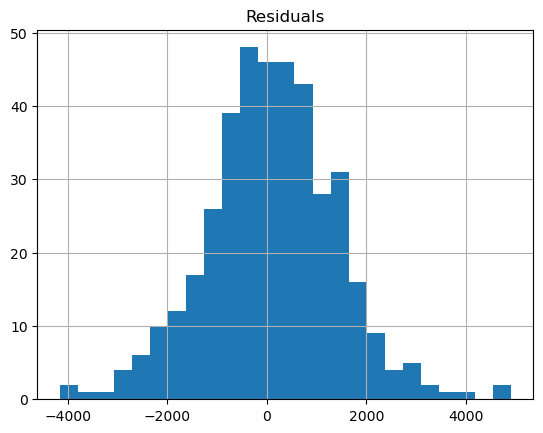

In [14]:
# Identify validation residuals of the regression model
# to check if they have approximately normal distribution.
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Develop data frame for the histogram using hist()
# function.
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

# Show histogram plot. 
# plt.tight_layout()
plt.show()

## Use statsmodels library to develop linear regression models.

In [15]:
# Apply sm.ols() function from statsmodels library
# to run a linear regression of Price on the 
# 11 predictors (including 2 dummy variables)
# in the training set.

# Create a data frame that inlcudes 11 predictors and
# outcome (Price) for training set.
train_df_sm = train_X.join(train_y)

# Display columns in train_df data frame.
train_df_sm.columns

Index(['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'CC', 'Doors',
       'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Price'],
      dtype='object')

In [16]:
# Create predictors for the model.
predictors_sm = train_X.columns

# Develop regression model formula, where
# Price is outcome and 11 predictors. 
formula = 'train_y ~ ' + ' + '.join(predictors_sm)

# Create multiple regression model using sm.ols()
# function from statsmodels library.
car_lm_sm = sm.ols(formula=formula, data=train_df_sm).fit()

# Display regression summary.
print(car_lm_sm.summary()) 

# The regression coefficients are the same as for the 
# regression model using LinearRegression() function 
# from scikit-learn library.

                            OLS Regression Results                            
Dep. Variable:                train_y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     319.0
Date:                Mon, 18 Mar 2024   Prob (F-statistic):          1.73e-239
Time:                        18:08:14   Log-Likelihood:                -5198.1
No. Observations:                 600   AIC:                         1.042e+04
Df Residuals:                     588   BIC:                         1.047e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1319.3544   1728.427  

In [17]:
# Apply predict() function to score predictions  
# for validation set.  
car_lm_pred_sm = car_lm_sm.predict(valid_X)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 

result = round(pd.DataFrame({'Actual': valid_y,'Predicted': car_lm_pred_sm, 
                       'Residual': valid_y - car_lm_pred_sm}), 2)
print('Actual, Prediction, and Residual Price for Validation Set')
print(result.head(10))
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set')
regressionSummary(valid_y, car_lm_pred_sm)

Actual, Prediction, and Residual Price for Validation Set
     Actual  Predicted  Residual
507   11500   10607.33    892.67
818    8950    9272.71   -322.71
452   11450   10617.95    832.05
368   11450   13600.40  -2150.40
242   11950   12396.69   -446.69
929    9995    9496.50    498.50
262   13500   12480.06   1019.94
810    7950    8834.15   -884.15
318    9900   12183.36  -2283.36
49    21950   19206.97   2743.03

Accuracy Measures for Validation Set

Regression statistics

                      Mean Error (ME) : 103.6803
       Root Mean Squared Error (RMSE) : 1312.8523
            Mean Absolute Error (MAE) : 1017.5972
          Mean Percentage Error (MPE) : -0.2633
Mean Absolute Percentage Error (MAPE) : 9.0111


## Exhaustive Search algorithm.

In [18]:
# Define train_model() function used in Executive Search
# algorithm with executive_search() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Executive Search
# algorithm with executive_search() function. 
def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # Apply negative sign as score is optimized to be 
    # as low as possible in exhaustive_search() function.
    return -adjusted_r2_score(train_y, pred_y, model)

# Create allVariables object with predcitors in train_X,
# i.e., training data set, with 11 predictor columns and 
# 600 records.
allVariables = train_X.columns

# The exhaustive_search() function consists of 3 arguments:
# - allVariables - list of all variables in training data set,
# - train_model() function that creates a model for a specific 
#    combination of variables,
# - score_model() function that score the model performance using
#     adjusted_r2.
results = exhaustive_search(allVariables, train_model, score_model)

# Create data[] loop process to identify and append the best model 
# for each combination of 1, 2, 3, ..., 11 variables with their 
# respective number of variables (n), adjusted R_squared (r2adj) and
# AIC. 
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

# Define the width of output presentation to be wider
# to display results in two rows (instead of more rows
# otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))

# Reset the output width to the default. 
pd.reset_option('display.width')

     n     r2adj           AIC  Age_08_04  Automatic     CC  Doors  Fuel_Type_Diesel  \
0    1  0.767901  10689.712094       True      False  False  False             False   
1    2  0.801160  10597.910645       True      False  False  False             False   
2    3  0.829659  10506.084235       True      False  False  False             False   
3    4  0.846357  10445.174820       True      False  False  False             False   
4    5  0.849044  10435.578836       True      False  False  False             False   
5    6  0.853172  10419.932278       True      False  False  False             False   
6    7  0.853860  10418.104025       True      False  False  False              True   
7    8  0.854297  10417.290103       True       True  False  False              True   
8    9  0.854172  10418.789079       True       True  False   True              True   
9   10  0.854036  10420.330800       True       True  False   True              True   
10  11  0.853796  10422.298278  

In [19]:
# Develop the multiple linear regression model based
# on the Exhaustive Search results.

# Identify predictors and outcome of the regression model.
predictors_ex = ['Age_08_04', 'Automatic', 'Fuel_Type_Diesel', 
                 'Fuel_Type_Petrol', 'HP', 'KM', 
                 'Quarterly_Tax', 'Weight']
outcome = 'Price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_ex]
y = car_df_reg[outcome]
train_X_ex, valid_X_ex, train_y_ex, valid_y_ex = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_ex = LinearRegression()
car_ex.fit(train_X_ex, train_y_ex)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Exhaustive Search')
print()
print('Intercept ', np.round(car_ex.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_ex.coef_, 2)}))


Regression Model for Training Set Using Exhaustive Search

Intercept  -1077.52
          Predictor  Coefficient
0         Age_08_04      -140.98
1         Automatic       425.43
2  Fuel_Type_Diesel      1086.40
3  Fuel_Type_Petrol      2277.11
4                HP        36.26
5                KM        -0.02
6     Quarterly_Tax        13.49
7            Weight        12.74


In [20]:
# Use predict() function to score (make) predictions 
# for validation set and measure their accuracy using
# Exhaustive Search algorithm.
car_ex_pred = car_ex.predict(valid_X_ex)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_ex,'Predicted': car_ex_pred, 
                       'Residual': valid_y_ex - car_ex_pred}), 2)
print()
print('Prediction for Validation Set Using Exhaustive Search') 
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Exhaustive Search')
regressionSummary(valid_y_ex, car_ex_pred)


Prediction for Validation Set Using Exhaustive Search
     Actual  Predicted  Residual
507   11500   10628.18    871.82
818    8950    9298.63   -348.63
452   11450   10548.30    901.70
368   11450   13638.44  -2188.44
242   11950   12323.92   -373.92
929    9995    9523.56    471.44
262   13500   12547.91    952.09
810    7950    8851.56   -901.56
318    9900   12120.39  -2220.39
49    21950   19197.82   2752.18

Accuracy Measures for Validation Set Using Exhaustive Search

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


## Backward Elimination algorithm.

In [21]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None

Best Variables from Backward Elimination Algorithm
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']


In [22]:
# Develop the multiple linear regression model based
# on the Backward Elimination results.

# Identify predictors and outcome of the regression model.
predictors_be = ['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 
                'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']
outcome = 'Price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_be]
y = car_df_reg[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_be = LinearRegression()
car_be.fit(train_X_be, train_y_be)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Backward Elimination')
print()
print('Intercept ', np.round(car_be.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_be.coef_, 2)}))


Regression Model for Training Set Using Backward Elimination

Intercept  -1077.52
          Predictor  Coefficient
0         Age_08_04      -140.98
1                KM        -0.02
2                HP        36.26
3         Automatic       425.43
4     Quarterly_Tax        13.49
5            Weight        12.74
6  Fuel_Type_Diesel      1086.40
7  Fuel_Type_Petrol      2277.11


In [23]:
# Use predict() to score predictions for validation set in
# regression model based Backward Elimination algorithm.
car_be_pred = car_be.predict(valid_X_be)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_be,'Predicted': car_be_pred, 
                       'Residual': valid_y_be - car_be_pred}), 2)
print()
print('Predictions for Validation Set Using Backward Elimination')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Backward Elimination')
regressionSummary(valid_y_be, car_be_pred)


Predictions for Validation Set Using Backward Elimination
     Actual  Predicted  Residual
507   11500   10628.18    871.82
818    8950    9298.63   -348.63
452   11450   10548.30    901.70
368   11450   13638.44  -2188.44
242   11950   12323.92   -373.92
929    9995    9523.56    471.44
262   13500   12547.91    952.09
810    7950    8851.56   -901.56
318    9900   12120.39  -2220.39
49    21950   19197.82   2752.18

Accuracy Measures for Validation Set Using Backward Elimination

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


##  Forward Selection algorithm.

In [24]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None

Best Variables from Forward Selection Algorithm
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


In [25]:
# Develop the multiple linear regression model based
# on the Forward Selection results.

# Identify predictors and outcome of the regression model.
predictors_fs = ['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 
                 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']
outcome = 'Price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_fs]
y = car_df_reg[outcome]
train_X_fs, valid_X_fs, train_y_fs, valid_y_fs = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_fs = LinearRegression()
car_fs.fit(train_X_fs, train_y_fs)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Forward Selection')
print()
print('Intercept ', np.round(car_fs.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_fs.coef_, 2)}))

Regression Model for Training Set Using Forward Selection

Intercept  -1077.52
          Predictor  Coefficient
0         Age_08_04      -140.98
1                HP        36.26
2            Weight        12.74
3                KM        -0.02
4     Quarterly_Tax        13.49
5  Fuel_Type_Petrol      2277.11
6  Fuel_Type_Diesel      1086.40
7         Automatic       425.43


In [26]:
# Use predict() to score predictions for validation set.
car_fs_pred = car_fs.predict(valid_X_fs)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_fs,'Predicted': car_fs_pred, 
                       'Residual': valid_y_fs - car_fs_pred}), 2)
print()
print('Predictions for Validation Set Using Forward Selection')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Forward Selection')
regressionSummary(valid_y_fs, car_fs_pred)


Predictions for Validation Set Using Forward Selection
     Actual  Predicted  Residual
507   11500   10628.18    871.82
818    8950    9298.63   -348.63
452   11450   10548.30    901.70
368   11450   13638.44  -2188.44
242   11950   12323.92   -373.92
929    9995    9523.56    471.44
262   13500   12547.91    952.09
810    7950    8851.56   -901.56
318    9900   12120.39  -2220.39
49    21950   19197.82   2752.18

Accuracy Measures for Validation Set Using Forward Selection

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


## Stepwise algorithm. 

In [27]:
# Define train_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Stepwise Selection
# algorithm with stepwise_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use stepwise() function to identify the best_model
# and best_variables with Stepwise section algorithm.
best_model_st, best_variables_st = stepwise_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Stepwise algorithm.
print()
print('Best Variables from Stepwise Selection Algorithm')
print(best_variables_st)

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=11565.07, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None

Best Variables from Stepwise Selection Algorithm
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']


In [28]:
# Develop the multiple linear regression model based
# on the Stepwise Selection results.

# Identify predictors and outcome of the regression model.
predictors_st = ['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 
                 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']
outcome = 'Price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_st]
y = car_df_reg[outcome]
train_X_st, valid_X_st, train_y_st, valid_y_st = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_st = LinearRegression()
car_st.fit(train_X_st, train_y_st)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Stewise Selection')
print()
print('Intercept ', np.round(car_st.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_st.coef_, 2)}))

Regression Model for Training Set Using Stewise Selection

Intercept  -1077.52
          Predictor  Coefficient
0         Age_08_04      -140.98
1                HP        36.26
2            Weight        12.74
3                KM        -0.02
4     Quarterly_Tax        13.49
5  Fuel_Type_Petrol      2277.11
6  Fuel_Type_Diesel      1086.40
7         Automatic       425.43


In [29]:
# Use predict() to score predictions for validation set 
# using Stepwise algorithm.
car_st_pred = car_st.predict(valid_X_st)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_st,'Predicted': car_st_pred, 
                       'Residual': valid_y_st - car_st_pred}), 2)
print()
print('Predictions for Validation Set Using Stepwise Selection')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Stepwise Selection')
regressionSummary(valid_y_st, car_st_pred)


Predictions for Validation Set Using Stepwise Selection
     Actual  Predicted  Residual
507   11500   10628.18    871.82
818    8950    9298.63   -348.63
452   11450   10548.30    901.70
368   11450   13638.44  -2188.44
242   11950   12323.92   -373.92
929    9995    9523.56    471.44
262   13500   12547.91    952.09
810    7950    8851.56   -901.56
318    9900   12120.39  -2220.39
49    21950   19197.82   2752.18

Accuracy Measures for Validation Set Using Stepwise Selection

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984
